In [1]:
import pandas as pd
import numpy as np
import datetime
from scorepi import *
from epiweeks import Week
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns

In [463]:
import warnings
warnings.filterwarnings('ignore')

In [223]:
model = "MOBS_NEU-GLEAM_COVID"
rd=12
predictions = pd.read_parquet(f'./dat/{model}_rd{rd}.pq')

start_week = Week(2022,2)
end_week = Week(2022,13)
max_date = datetime.datetime(2022, 3, 15)



predictions["scenario_letter"] = predictions.scenario_id.str[0]
predictions.drop(predictions[predictions.type == 'point'].index, inplace=True)

incidence = True
target = 'hosp'
target_location = 'US'

In [224]:
incidence = True
target = 'hosp'
target_location = 'US'

In [21]:
predictions

,scenario_id,scenario_name,model_projection_date,target,target_end_date,quantile,type,location,value,scenario_letter
12,A-2022-01-09,optSev_highIE,2022-01-09,1 wk ahead inc death,2022-01-15,0.000,quantile,01,1.272734,A
13,A-2022-01-09,optSev_highIE,2022-01-09,2 wk ahead inc death,2022-01-22,0.000,quantile,01,0.781734,A
14,A-2022-01-09,optSev_highIE,2022-01-09,3 wk ahead inc death,2022-01-29,0.000,quantile,01,0.752752,A
15,A-2022-01-09,optSev_highIE,2022-01-09,4 wk ahead inc death,2022-02-05,0.000,quantile,01,1.291676,A
16,A-2022-01-09,optSev_highIE,2022-01-09,5 wk ahead inc death,2022-02-12,0.000,quantile,01,3.746816,A
...,...,...,...,...,...,...,...,...,...,...
389371,D-2022-01-09,pessSev_lowIE,2022-01-09,9 wk ahead inc hosp,2022-03-12,0.900,quantile,US,646.468869,D
389372,D-2022-01-09,pessSev_lowIE,2022-01-09,9 wk ahead inc hosp,2022-03-12,0.950,quantile,US,1155.245091,D
389373,D-2022-01-09,pessSev_lowIE,2022-01-09,9 wk ahead inc hosp,2022-03-12,0.975,quantile,US,3292.928437,D
389374,D-2022-01-09,pessSev_lowIE,2022-01-09,9 wk ahead inc hosp,2022-03-12,0.990,quantile,US,3754.068425,D


In [ ]:
# only want quantile predictions (not point)

In [28]:
predictions = predictions[predictions.location == 'US']

In [39]:
target_prediction_list = [f"{i} wk ahead {'inc' if incidence else 'cum'} {target}" for i in range(1,30+1)]

predictions = predictions[(predictions['target'].isin(target_prediction_list))]

if max_date:
    predictions = predictions[predictions['target_end_date'] <= max_date]

if len(predictions) == 0:
    raise RuntimeError(f"There are no predictions for model {model} at location {target_location}")

scenarios = list(predictions['scenario_letter'].drop_duplicates())
predictions_list = [Predictions(predictions[predictions['scenario_letter'] == scenario], t_col='target_end_date') for scenario in scenarios]
            

In [45]:
list(predictions_list[0].target.unique())[0]

'1 wk ahead inc hosp'

In [46]:
sample = predictions_list[0][predictions_list[0].target =='1 wk ahead inc hosp' ]

In [47]:
sample

,scenario_id,scenario_name,model_projection_date,target,target_end_date,quantile,type,location,value,scenario_letter
0,A-2022-01-09,optSev_highIE,2022-01-09,1 wk ahead inc hosp,2022-01-15,0.000,quantile,US,14970.195369,A
1,A-2022-01-09,optSev_highIE,2022-01-09,1 wk ahead inc hosp,2022-01-15,1.000,quantile,US,304994.748758,A
2,A-2022-01-09,optSev_highIE,2022-01-09,1 wk ahead inc hosp,2022-01-15,0.990,quantile,US,302270.357276,A
3,A-2022-01-09,optSev_highIE,2022-01-09,1 wk ahead inc hosp,2022-01-15,0.975,quantile,US,301443.313987,A
4,A-2022-01-09,optSev_highIE,2022-01-09,1 wk ahead inc hosp,2022-01-15,0.950,quantile,US,286918.897559,A
5,A-2022-01-09,optSev_highIE,2022-01-09,1 wk ahead inc hosp,2022-01-15,0.900,quantile,US,271452.784495,A
6,A-2022-01-09,optSev_highIE,2022-01-09,1 wk ahead inc hosp,2022-01-15,0.850,quantile,US,256955.837789,A
7,A-2022-01-09,optSev_highIE,2022-01-09,1 wk ahead inc hosp,2022-01-15,0.750,quantile,US,239138.860683,A
8,A-2022-01-09,optSev_highIE,2022-01-09,1 wk ahead inc hosp,2022-01-15,0.700,quantile,US,231510.367142,A
9,A-2022-01-09,optSev_highIE,2022-01-09,1 wk ahead inc hosp,2022-01-15,0.650,quantile,US,222517.581150,A


In [195]:
interpvals = []
for i in range(len(predictions_list)):
    s = predictions_list[i]
    vals = list(s['value'])
    for j in range(len(vals)):
        interpvals.append(vals[j])

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be rem

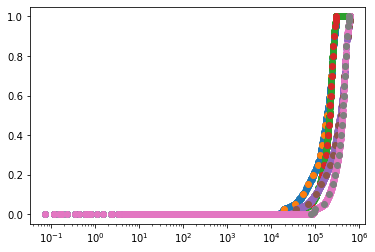

In [205]:
interpresults = pd.DataFrame(columns=['scenario_letter', 'quantile_val','xvalue'])
for i in range(len(predictions_list)):

    sample = predictions_list[i][predictions_list[i].target =='1 wk ahead inc hosp' ]
    quantiles = list(sample['quantile'])
    vals = list(sample['value'])

    a = zip(vals, quantiles)
    a=list(a)
    res = sorted(a, key = lambda x: x[1])
    vals, quants = list(zip(*res))

    vals = list(vals)
    quants = list(quants)
    
    y = np.interp(interpvals, vals, quants)
    
    
    a = zip(interpvals, y)
    a=list(a)
    res = sorted(a, key = lambda x: x[1])
    interpvals, y = list(zip(*res))
    
    
    plt.semilogx(interpvals, y, 'o')
    plt.semilogx(vals, quants, 'o', markersize=6)

    
    letter = list(sample.scenario_letter.unique())[0]
    y = list(y)
    interpvals = list(interpvals)
    for i in range(len(y)):
        qval = y[i]
        xval = interpvals[i]
        new_row = {'scenario_letter':letter, 'quantile_val':qval,'xvalue':xval}
 
        interpresults = interpresults.append(new_row, ignore_index=True)
            

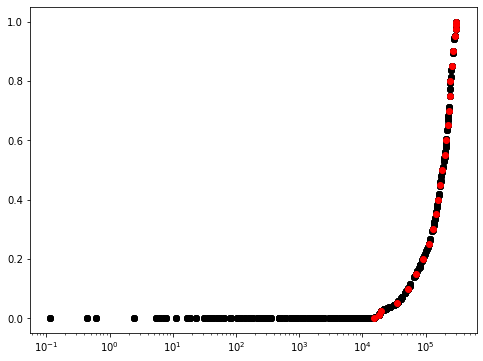

In [141]:
plt.figure(figsize=(8,6))

plt.semilogx(interpvals, y, 'ok')
plt.semilogx(vals, quants, 'or', markersize=6)

plt.show()

In [206]:
interpresults

,scenario_letter,quantile_val,xvalue
0,A,0.00,14970.195369
1,A,0.00,5579.731655
2,A,0.00,6088.541922
3,A,0.00,9518.682350
4,A,0.00,13776.223301
...,...,...,...
3595,D,0.99,578730.456927
3596,D,1.00,583484.887764
3597,D,1.00,599050.776969
3598,D,1.00,600661.081512


In [207]:
df2 = interpresults.groupby('xvalue')['quantile_val'].apply(list)
allxvals = list(df2.index)

In [208]:
probavg = pd.DataFrame(columns=['xval', 'avg_quant'])

for i in allxvals:
    quants = df2[i]
    avgquant = np.mean(quants)
    new_row = {'xval':i, 'avg_quant':avgquant}
 
    probavg = probavg.append(new_row, ignore_index=True)

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2233780288.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  probavg = probavg.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2233780288.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  probavg = probavg.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2233780288.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  probavg = probavg.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2233780288.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [202]:
probavg

,xval,avg_quant
0,0.075008,0.00
1,0.116360,0.00
2,0.118326,0.00
3,0.150045,0.00
4,0.172047,0.00
...,...,...
895,578730.456927,0.99
896,583484.887764,1.00
897,599050.776969,1.00
898,600661.081512,1.00


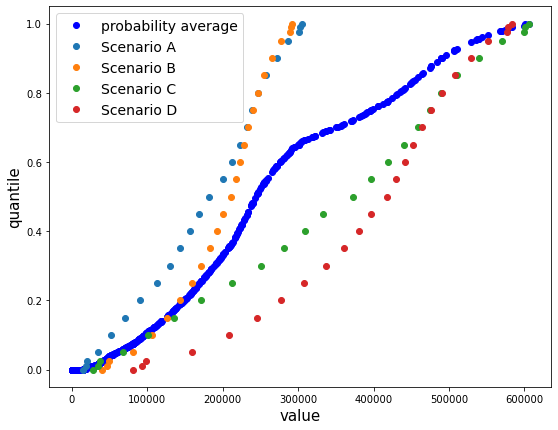

In [219]:
plt.figure(figsize=(9,7))
plt.plot(probavg['xval'], probavg['avg_quant'],'bo', label = 'probability average')
for i in range(len(predictions_list)):
    letter = list(predictions_list[i].scenario_letter.unique())[0]
    sample = predictions_list[i][predictions_list[i].target =='1 wk ahead inc hosp' ]
    quantiles = list(sample['quantile'])
    vals = list(sample['value'])

    a = zip(vals, quantiles)
    a=list(a)
    res = sorted(a, key = lambda x: x[1])
    vals, quants = list(zip(*res))

    vals = list(vals)
    quants = list(quants)
    
    plt.plot(vals, quants,'o', label = 'Scenario ' + letter)
    
plt.xlabel('value', fontsize=15)
plt.ylabel('quantile', fontsize=15)
plt.legend(fontsize=14)

In [ ]:
# above plot etc only for one time step. need to loop over all weeks to get full LOP ensemble

In [222]:
if target == 'hosp':
    target_obs = 'hospitalization'
else:
    target_obs = target
observations = pd.read_parquet(f"./dat/truth_{'inc' if incidence else 'cum'}_{target_obs}.pq")
observations['date'] = pd.to_datetime(observations['date'])

#filter start - end week
observations = observations[(observations['date'] >= pd.to_datetime(start_week.startdate())) & 
                            (observations['date'] <= pd.to_datetime(end_week.enddate()))]


    
#filter location
observations = observations[observations['location'] == target_location]

#aggregate to weekly
observations = observations.groupby(['location', pd.Grouper(key='date', freq='W-SAT')]).sum().reset_index()

if max_date:
    observations = observations[observations['date'] <= max_date].copy()

#transform to Observation object
observations = Observations(observations)

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/177555968.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  observations = observations.groupby(['location', pd.Grouper(key='date', freq='W-SAT')]).sum().reset_index()


In [319]:
target_prediction_list = [f"{i} wk ahead {'inc' if incidence else 'cum'} {target}" for i in range(1,len(observations)+1)]

predictions = predictions[predictions.location == 'US']
predictions = predictions[(predictions['target'].isin(target_prediction_list))]

if max_date:
    predictions = predictions[predictions['target_end_date'] <= max_date]

if len(predictions) == 0:
    raise RuntimeError(f"There are no predictions for model {model} at location {target_location}")

scenarios = list(predictions['scenario_letter'].drop_duplicates())
predictions_list = [Predictions(predictions[predictions['scenario_letter'] == scenario], t_col='target_end_date') for scenario in scenarios]
            


In [321]:
target_list = list(predictions_list[0].target.unique())

In [322]:
target_list = list(predictions_list[0].target.unique())

interpvalsdf = pd.DataFrame(columns=['target', 'interpvals'])
for wk in target_list:

    interpvals = []
    for i in range(len(predictions_list)):
        s = predictions_list[i][predictions_list[i]['target'] ==wk ]
        vals = list(s['value'])
        for j in range(len(vals)):
            interpvals.append(vals[j])
            
    new_row = {'target':wk, 'interpvals':interpvals}
 
    interpvalsdf = interpvalsdf.append(new_row, ignore_index=True)

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1127428170.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpvalsdf = interpvalsdf.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1127428170.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpvalsdf = interpvalsdf.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1127428170.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpvalsdf = interpvalsdf.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1127428170.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

In [323]:
# for all weeks 

interpresults = pd.DataFrame(columns=['scenario_letter', 'quantile_val','xvalue', 'target'])

for wk in target_list:

    for i in range(len(predictions_list)):
        interpvals = list(interpvalsdf[interpvalsdf['target']==wk].interpvals)[0]
    
        sample = predictions_list[i][predictions_list[i].target == wk ]
    
    
        quantiles = list(sample['quantile'])
        vals = list(sample['value'])

        a = zip(vals, quantiles)
        a=list(a)
        res = sorted(a, key = lambda x: x[1])
        vals, quants = list(zip(*res))

        vals = list(vals)
        quants = list(quants)
    
        y = np.interp(interpvals, vals, quants)
    
    
        a = zip(interpvals, y)
        a=list(a)
        res = sorted(a, key = lambda x: x[1])
        interpvals, y = list(zip(*res))
    
    
        letter = list(sample.scenario_letter.unique())[0]
        y = list(y)
        interpvals = list(interpvals)
        for i in range(len(y)):
            qval = y[i]
            xval = interpvals[i]
            new_row = {'scenario_letter':letter, 'quantile_val':qval,'xvalue':xval, 'target':wk}
 
            interpresults = interpresults.append(new_row, ignore_index=True)
            

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2125303342.py:39: FutureWarning: The frame.append method is deprecated and will be rem

In [324]:
interpresults

,scenario_letter,quantile_val,xvalue,target
0,A,0.000000,14970.195369,1 wk ahead inc hosp
1,A,0.010000,18133.398048,1 wk ahead inc hosp
2,A,0.025000,19366.522882,1 wk ahead inc hosp
3,A,0.038761,27866.268311,1 wk ahead inc hosp
4,A,0.049836,34706.536781,1 wk ahead inc hosp
...,...,...,...,...
3595,D,1.000000,15773.635404,9 wk ahead inc hosp
3596,D,1.000000,6740.673307,9 wk ahead inc hosp
3597,D,1.000000,16735.786977,9 wk ahead inc hosp
3598,D,1.000000,19440.783861,9 wk ahead inc hosp


In [325]:
df2 = interpresults.groupby(['target', 'xvalue'])['quantile_val'].mean()
allxvals = list(df2.index)

In [326]:
df2 = interpresults.groupby(['target', 'xvalue'])['quantile_val'].mean()
allxvals = list(df2.index)

probavg = pd.DataFrame(columns=['xval', 'avg_quant', 'target'])

for i in allxvals:
    avgquant = df2[i]
    targ = i[0]
    val = i[1]
    new_row = {'xval':val, 'avg_quant':avgquant, 'target':targ}
 
    probavg = probavg.append(new_row, ignore_index=True)

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/3976733016.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  probavg = probavg.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/3976733016.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  probavg = probavg.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/3976733016.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  probavg = probavg.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/3976733016.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/3976733016.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  probavg = probavg.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/3976733016.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  probavg = probavg.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/3976733016.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  probavg = probavg.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/3976733016.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/3976733016.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  probavg = probavg.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/3976733016.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  probavg = probavg.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/3976733016.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  probavg = probavg.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/3976733016.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [327]:
probavg

,xval,avg_quant,target
0,14970.195369,0.000000,1 wk ahead inc hosp
1,18133.398048,0.002500,1 wk ahead inc hosp
2,19366.522882,0.006250,1 wk ahead inc hosp
3,27866.268311,0.009690,1 wk ahead inc hosp
4,34706.536781,0.014959,1 wk ahead inc hosp
...,...,...,...
895,8609.919513,0.986293,9 wk ahead inc hosp
896,9991.567054,0.989749,9 wk ahead inc hosp
897,15773.635404,0.993750,9 wk ahead inc hosp
898,16735.786977,0.997500,9 wk ahead inc hosp


In [446]:
probavg_ret = pd.DataFrame(columns=['quantile','value', 'target', 'target_end_date'])
ind = 0

enddates = predictions_list[0].target_end_date.unique()
for wk in target_list:
    enddate = enddates[ind]
    ind+=1
    ret_quants = list(predictions_list[0][predictions_list[0].target =='1 wk ahead inc hosp']['quantile'].unique())
    curquants = list(probavg[probavg['target']==wk]['avg_quant'])
    curxs = list(probavg[probavg['target']==wk]['xval'])
    yret = np.interp(ret_quants, curquants, curxs)
    
    yret = list(yret)
    
    for i in range(len(yret)):
        new_row = {'quantile':ret_quants[i],'value':yret[i], 'target':wk, 'target_end_date':enddate}
 
        probavg_ret = probavg_ret.append(new_row, ignore_index=True)

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1638100539.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  probavg_ret = probavg_ret.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1638100539.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  probavg_ret = probavg_ret.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1638100539.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  probavg_ret = probavg_ret.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1638100539.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pa

In [447]:
probavg_ret

,quantile,value,target,target_end_date
0,0.000,14970.195369,1 wk ahead inc hosp,2022-01-15
1,1.000,605733.055294,1 wk ahead inc hosp,2022-01-15
2,0.990,583001.348489,1 wk ahead inc hosp,2022-01-15
3,0.975,563417.325413,1 wk ahead inc hosp,2022-01-15
4,0.950,533607.022131,1 wk ahead inc hosp,2022-01-15
...,...,...,...,...
220,0.250,19.593182,9 wk ahead inc hosp,2022-03-12
221,0.300,26.376037,9 wk ahead inc hosp,2022-03-12
222,0.350,35.032208,9 wk ahead inc hosp,2022-03-12
223,0.400,44.312405,9 wk ahead inc hosp,2022-03-12


In [449]:
a = Predictions(probavg_ret, t_col='target_end_date')

In [450]:
a.get_point()

array([2.43788842e+05, 2.29940575e+05, 1.48242725e+05, 5.91696365e+04,
       1.83447871e+04, 5.14073490e+03, 1.32192353e+03, 3.12814361e+02,
       7.25705169e+01])

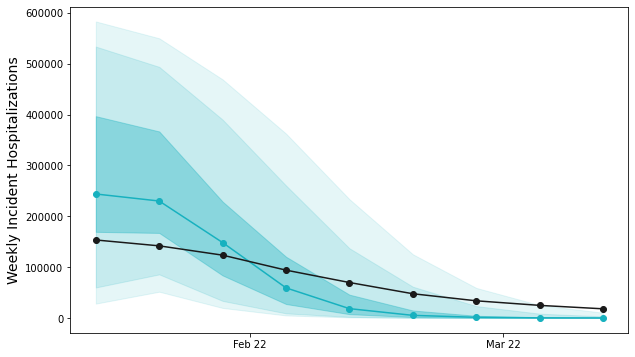

In [456]:
predictions = Predictions(probavg_ret, t_col='target_end_date')

intervals = [(0.01,0.99),(0.05,0.95),(0.25,0.75)]
map_alpha = lambda interval_range: 0.5 * (1-interval_range) + 0.1

fig, axes = plt.subplots( figsize=(10, 6))

for interval in intervals:
        q_low,q_upp = interval
        interval_range = q_upp - q_low
        alpha = map_alpha(interval_range)
        pred_low = predictions.get_quantile(q_low)
        pred_upp = predictions.get_quantile(q_upp)
        axes.fill_between(observations.get_t(),pred_upp,pred_low, color='#17B1BF', alpha=alpha)
        
pred_point = predictions.get_point()
axes.plot(observations.get_t(),pred_point,'-o',color='#17B1BF')


plt.plot(observations.get_t(),observations.get_value(), '-o', color='#1a1a1a', label = 'observed')

set_date_axis_fmt(axes)
    

#set y axis 
axes.set_ylabel("Weekly Incident Hospitalizations", fontsize=14)


plt.show()

In [436]:
import matplotlib.dates as mdates
def set_date_axis_fmt(ax):
    # Set the locator
    locator = mdates.MonthLocator()  # every month
    # Specify the format
    fmt = mdates.DateFormatter('%b %y')

    X = ax.xaxis
    X.set_major_locator(locator)
    # Specify formatter
    X.set_major_formatter(fmt)

In [ ]:
targs = list(probavg.target.unique())
wk = 1
wks = []
xmeds = []
qmeds = []

xlows = []
qlows = []
xups = []
qups = []

xlowlows = []
qlowlows = []
xupups = []
qupups = []
for i in targs:
    wks.append(wk)
    med = probavg[probavg['target'] == i]
    xmed = list(med[med['avg_quant'].between(.48, .52)].xval)[0]
    qmed = list(med[med['avg_quant'].between(.48, .52)].avg_quant)[0]
    
    xmeds.append(xmed)
    qmeds.append(qmed)
    
    
    xlow = list(med[med['avg_quant'].between(.23, .27)].xval)[0]
    qlow = list(med[med['avg_quant'].between(.23, .27)].avg_quant)[0]
    
    xlows.append(xlow)
    qlows.append(qlow)
    
    
    xup = list(med[med['avg_quant'].between(.73, .77)].xval)[0]
    qup = list(med[med['avg_quant'].between(.73, .77)].avg_quant)[0]
    
    xups.append(xup)
    qups.append(qup)
    
    
    xlowlow = list(med[med['avg_quant'].between(.03, .07)].xval)[0]
    qlowlow = list(med[med['avg_quant'].between(.03, .07)].avg_quant)[0]
    
    xlowlows.append(xlowlow)
    qlowlows.append(qlowlow)
    
    
    xupup = list(med[med['avg_quant'].between(.93, .97)].xval)[0]
    qupup = list(med[med['avg_quant'].between(.93, .97)].avg_quant)[0]
    
    xupups.append(xupup)
    qupups.append(qupup)
    
    
    
    wk+=1

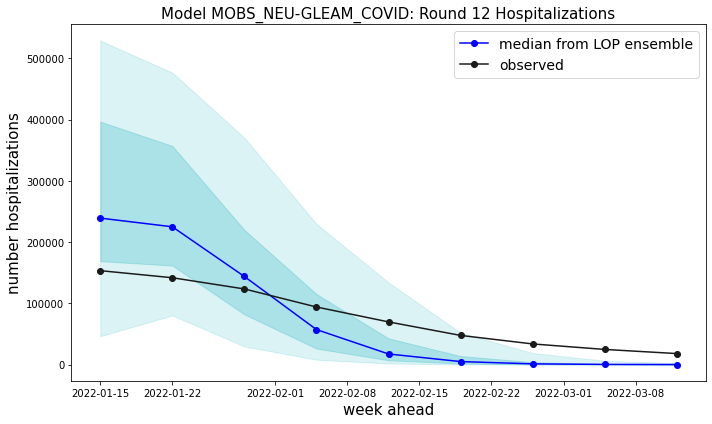

In [382]:
# worse plot:

plt.figure(figsize=(10,6))
plt.plot(observations.get_t(), xs, 'b-o', label = 'median from LOP ensemble')
plt.fill_between(observations.get_t(), xups, xlows, color = '#17B1BF', alpha = .25)
plt.fill_between(observations.get_t(), xupups, xlowlows, color = '#17B1BF', alpha = .15)
plt.plot(observations.get_t(),observations.get_value(), '-o', color='#1a1a1a', label = 'observed')
plt.xlabel('week ahead', fontsize=15)
plt.ylabel('number hospitalizations', fontsize=15)
plt.legend(fontsize=14)
plt.title('Model MOBS_NEU-GLEAM_COVID: Round 12 Hospitalizations', fontsize=15)
plt.tight_layout()
plt.savefig('lopensembletest.pdf')
plt.show()

In [441]:
predictions_list[0].target_end_date.unique()

array(['2022-01-15T00:00:00.000000000', '2022-01-22T00:00:00.000000000',
       '2022-01-29T00:00:00.000000000', '2022-02-05T00:00:00.000000000',
       '2022-02-12T00:00:00.000000000', '2022-02-19T00:00:00.000000000',
       '2022-02-26T00:00:00.000000000', '2022-03-05T00:00:00.000000000',
       '2022-03-12T00:00:00.000000000'], dtype='datetime64[ns]')

In [551]:
def prob_avg_ensemble(predictions_list):

    target_list = list(predictions_list[0].target.unique())

    interpvalsdf = pd.DataFrame(columns=['target', 'interpvals'])
    for wk in target_list:

        interpvals = []
        for i in range(len(predictions_list)):
            s = predictions_list[i][predictions_list[i]['target'] ==wk ]
            vals = list(s['value'])
            for j in range(len(vals)):
                interpvals.append(vals[j])
            
        new_row = {'target':wk, 'interpvals':interpvals}
 
        interpvalsdf = interpvalsdf.append(new_row, ignore_index=True)
    
    interpresults = pd.DataFrame(columns=['scenario_letter', 'quantile_val','xvalue', 'target'])

    for wk in target_list:

        for i in range(len(predictions_list)):
            interpvals = list(interpvalsdf[interpvalsdf['target']==wk].interpvals)[0]
    
            sample = predictions_list[i][predictions_list[i].target == wk ]
    
    
            quantiles = list(sample['quantile'])
            vals = list(sample['value'])

            a = zip(vals, quantiles)
            a=list(a)
            res = sorted(a, key = lambda x: x[1])
            vals, quants = list(zip(*res))

            vals = list(vals)
            quants = list(quants)
    
            y = np.interp(interpvals, vals, quants)
    
    
            a = zip(interpvals, y)
            a=list(a)
            res = sorted(a, key = lambda x: x[1])
            interpvals, y = list(zip(*res))
    
    
            letter = list(sample.scenario_letter.unique())[0]
            y = list(y)
            interpvals = list(interpvals)
            for i in range(len(y)):
                qval = y[i]
                xval = interpvals[i]
                new_row = {'scenario_letter':letter, 'quantile_val':qval,'xvalue':xval, 'target':wk}
 
                interpresults = interpresults.append(new_row, ignore_index=True)

    df2 = interpresults.groupby(['target', 'xvalue'])['quantile_val'].mean()
    allxvals = list(df2.index)

    probavg = pd.DataFrame(columns=['xval', 'avg_quant', 'target'])

    for i in allxvals:
        avgquant = df2[i]
        targ = i[0]
        val = i[1]
        new_row = {'xval':val, 'avg_quant':avgquant, 'target':targ}
 
        probavg = probavg.append(new_row, ignore_index=True)
    
    
    
    probavg_ret = pd.DataFrame(columns=['quantile','value', 'target', 'target_end_date'])
    ind = 0

    enddates = predictions_list[0].target_end_date.unique()
    for wk in target_list:
        enddate = enddates[ind]
        ind+=1
        ret_quants = list(predictions_list[0][predictions_list[0].target =='1 wk ahead inc ' + str(target)]['quantile'].unique())
        curquants = list(probavg[probavg['target']==wk]['avg_quant'])
        curxs = list(probavg[probavg['target']==wk]['xval'])
        yret = np.interp(ret_quants, curquants, curxs)
    
        yret = list(yret)
    
        for i in range(len(yret)):
            new_row = {'quantile':ret_quants[i],'value':yret[i], 'target':wk, 'target_end_date':enddate}
 
            probavg_ret = probavg_ret.append(new_row, ignore_index=True)
    
   # probavg_ret = Predictions(probavg_ret, t_col='target_end_date')
    
    return probavg_ret


In [594]:
#model = "Ensemble"
model = 'MOBS_NEU-GLEAM_COVID'
rd=12
predictions = pd.read_parquet(f'./dat/{model}_rd{rd}.pq')

start_week = Week(2022,2)
end_week = Week(2022,13)
max_date = datetime.datetime(2022, 3, 15)



predictions["scenario_letter"] = predictions.scenario_id.str[0]
predictions.drop(predictions[predictions.type == 'point'].index, inplace=True)

incidence = True
target = 'death'
target_location = 'US'

In [595]:
if target == 'hosp':
    target_obs = 'hospitalization'
else:
    target_obs = target
observations = pd.read_parquet(f"./dat/truth_{'inc' if incidence else 'cum'}_{target_obs}.pq")
observations['date'] = pd.to_datetime(observations['date'])

#filter start - end week
observations = observations[(observations['date'] >= pd.to_datetime(start_week.startdate())) & 
                            (observations['date'] <= pd.to_datetime(end_week.enddate()))]


    
#filter location
observations = observations[observations['location'] == target_location]

#aggregate to weekly
observations = observations.groupby(['location', pd.Grouper(key='date', freq='W-SAT')]).sum().reset_index()

if max_date:
    observations = observations[observations['date'] <= max_date].copy()

#transform to Observation object
observations = Observations(observations)

In [596]:
target_prediction_list = [f"{i} wk ahead {'inc' if incidence else 'cum'} {target}" for i in range(1,len(observations)+1)]

predictions = predictions[predictions.location == 'US']
predictions = predictions[(predictions['target'].isin(target_prediction_list))]

if max_date:
    predictions = predictions[predictions['target_end_date'] <= max_date]

if len(predictions) == 0:
    raise RuntimeError(f"There are no predictions for model {model} at location {target_location}")

scenarios = list(predictions['scenario_letter'].drop_duplicates())
predictions_list = [Predictions(predictions[predictions['scenario_letter'] == scenario], t_col='target_end_date') for scenario in scenarios]
            


In [562]:
probavg_ret = prob_avg_ensemble(predictions_list)

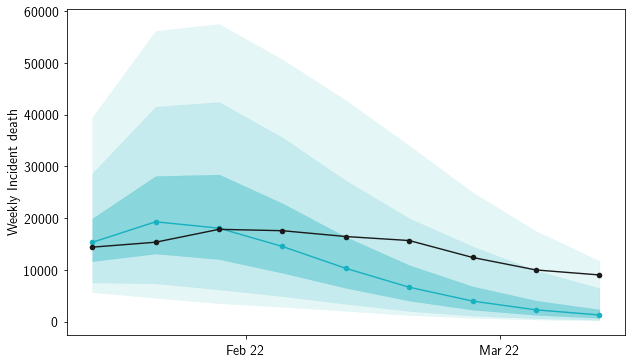

In [580]:
predictions = Predictions(probavg_ret, t_col='target_end_date')

intervals = [(0.01,0.99),(0.05,0.95),(0.25,0.75)]
map_alpha = lambda interval_range: 0.5 * (1-interval_range) + 0.1

fig, axes = plt.subplots( figsize=(10, 6))

for interval in intervals:
        q_low,q_upp = interval
        interval_range = q_upp - q_low
        alpha = map_alpha(interval_range)
        pred_low = predictions.get_quantile(q_low)
        pred_upp = predictions.get_quantile(q_upp)
        axes.fill_between(observations.get_t(),pred_upp,pred_low, color='#17B1BF', alpha=alpha)
        
pred_point = predictions.get_point()
axes.plot(observations.get_t(),pred_point,'-o',color='#17B1BF')


plt.plot(observations.get_t(),observations.get_value(), '-o', color='#1a1a1a', label = 'observed')

set_date_axis_fmt(axes)
    

#set y axis 
axes.set_ylabel("Weekly Incident " + str(target), fontsize=14)


plt.show()

In [591]:
#predictionsavg = Predictions(prob_avg_ensemble(predictions_list))

In [598]:
med_ensemble_predictions = median_ensemble(predictions_list)
predictionsavg = Predictions(prob_avg_ensemble(predictions_list), t_col='target_end_date')
#ex_ensemble_predictions = extreme_ensemble(predictions_list)
predictions_list += [med_ensemble_predictions, predictionsavg]
labels = ["Scenario " + scenario[0] for scenario in sorted(scenarios)] + ["Median aggregate", "Probability Average"]
# print(labels)

In [599]:
fontsize=14
plt.style.use('seaborn-paper')
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{lmodern}\usepackage{sfmath}')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('axes', labelsize=fontsize)
color = '#17B1BF'

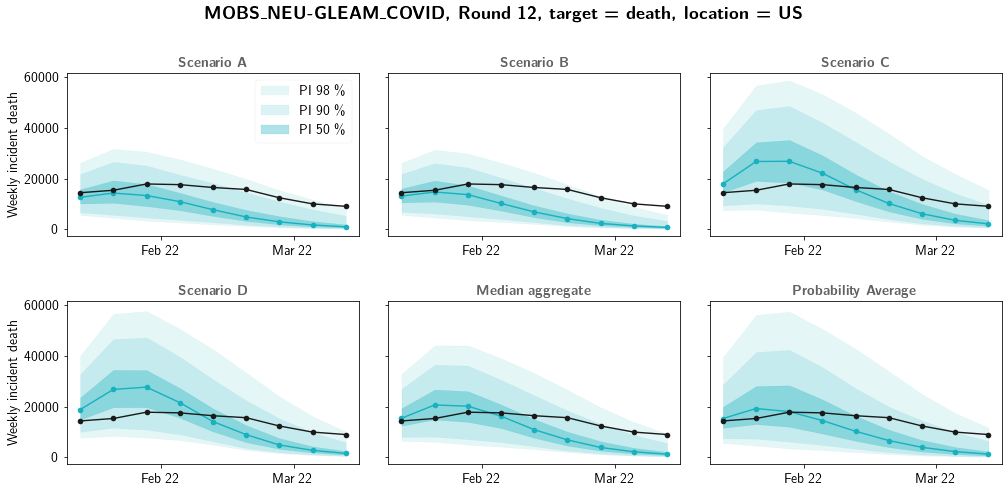

In [601]:
width = 7.057*2.
height = width/2
fig, axes = plt.subplots(2,3, figsize=(width, height), sharey=True)
plt.subplots_adjust(left=0.07, bottom=0.08, right=0.99, top=0.85, wspace=0.1,
                    hspace=0.4)
fig.suptitle(r"\textbf"+"{"+f"{model}, Round {rd}, target = {target_obs}, location = {'US'}"+"}", fontsize=fontsize+4)
for ind,(predictions,label) in enumerate(zip(predictions_list,labels)):
    i = ind // 3
    j = ind % 3
    
    #title
    axes[i][j].set_title(r"\textbf"+"{"+f"{label}"+"}", fontsize=fontsize, color='#636363')

    t = np.unique(observations.get_t())

    #intervals
    for interval in intervals:
        q_low,q_upp = interval
        interval_range = q_upp - q_low
        alpha = map_alpha(interval_range)
        pred_low = predictions.get_quantile(q_low)
        pred_upp = predictions.get_quantile(q_upp)
        axes[i][j].fill_between(t,pred_upp,pred_low, color=color, alpha=alpha,
                               label=fr"PI {int(round(interval_range*100))} \%")
    if i == 0 and j == 0:
        axes[i][j].legend(frameon=True, fontsize=fontsize)

    #point estimate
    pred_point = predictions.get_point()
    if len(pred_point) > 0:
        axes[i][j].plot(t,pred_point,'-o',color=color)
    
    #plot surveillance
    axes[i][j].plot(observations.get_t(),observations.get_value(), '-o', color='#1a1a1a')
    
    #set x axis
    set_date_axis_fmt(axes[i][j])
    

    #set y axis 
    axes[i][0].set_ylabel(f"Weekly {'incident' if incidence else 'cumulative'} {target}")
    
    
#path = f"./figs/rd{rd}/{'inc' if incidence else 'cum'}_{target}/{target_loc_name}/"
#Path(path).mkdir(parents=True, exist_ok=True)

#plt.savefig(path+f"{model}.pdf")

In [602]:
timestamped_scores = dict()
aggregated_scores = dict()
for label,predictions in zip(labels,predictions_list):
    d,df = score_utils.all_scores_from_df(observations, predictions, mismatched_allowed=False)
    timestamped_scores[label] = df
    aggregated_scores[label] = d
    
    
aggregated_data = defaultdict(list)
for label in labels:
    aggregated_data['Case'] += [label]
    aggregated_data['95% PI Coverage'] += [aggregated_scores[label]['95_cov']]
    aggregated_data['50% PI Coverage'] += [aggregated_scores[label]['50_cov']]
    aggregated_data['WIS'] += [aggregated_scores[label]['wis_mean']]
    aggregated_data['MAE'] += [aggregated_scores[label]['point_absolute_error_mean']]
    aggregated_data['WIS dispersion %'] += [100*aggregated_scores[label]['dispersion_wis_fraction']]
    aggregated_data['WIS underprediction %'] += [100*aggregated_scores[label]['underprediction_wis_fraction']]
    aggregated_data['WIS overprediction %'] += [100*aggregated_scores[label]['overprediction_wis_fraction']]
    
    
agg_data_df = pd.DataFrame(aggregated_data)
agg_data_df['Model'] = model
agg_data_df

,Case,95% PI Coverage,50% PI Coverage,WIS,MAE,WIS dispersion %,WIS underprediction %,WIS overprediction %,Model
0,Scenario A,0.888889,0.222222,4262.931727,6626.981102,20.059233,0.000000,79.940767,MOBS_NEU-GLEAM_COVID
1,Scenario B,0.777778,0.222222,4883.968506,6875.893698,15.006072,0.000000,84.993928,MOBS_NEU-GLEAM_COVID
2,Scenario C,1.000000,0.222222,3492.405744,6039.872682,44.153153,22.957778,32.889069,MOBS_NEU-GLEAM_COVID
3,Scenario D,1.000000,0.222222,3976.814373,6771.529546,33.999939,22.889014,43.111047,MOBS_NEU-GLEAM_COVID
4,Median aggregate,0.888889,0.444444,3513.534388,5375.061407,31.570649,4.071273,64.358078,MOBS_NEU-GLEAM_COVID
5,Probability Average,0.888889,0.444444,3569.362808,5240.952691,37.840508,2.126154,60.033338,MOBS_NEU-GLEAM_COVID


# Multi Model Stuff

In [ ]:
med_ensemble_predictions = median_ensemble(predictions_list)
predictionsavg = Predictions(prob_avg_ensemble(predictions_list), t_col='target_end_date')
#ex_ensemble_predictions = extreme_ensemble(predictions_list)
predictions_list += [med_ensemble_predictions, predictionsavg]
labels = ["Scenario " + scenario[0] for scenario in sorted(scenarios)] + ["Median aggregate", "Probability Average"]
# print(labels)

In [608]:
locations = pd.read_csv('./dat/locations.csv',dtype={'location':str})
model = "MOBS_NEU-GLEAM_COVID"
rd=12
predictions = pd.read_parquet(f'./dat/{model}_rd{rd}.pq')

loclist = list(predictions.location.unique())
loclist.remove('US')

In [609]:
rd = 12
start_week = Week(2022,2)
end_week = Week(2022,13)
max_date = datetime.datetime(2022, 3, 15)
models = ["Ensemble","Ensemble_LOP","Ensemble_LOP_untrimmed","JHU_IDD-CovidSP","MOBS_NEU-GLEAM_COVID","NCSU-COVSIM","NotreDame-FRED","UNCC-hierbin","USC-SIkJalpha",
           "UTA-ImmunoSEIRS","UVA-EpiHiper","UVA-adaptive"]

In [611]:
median_ensembles = dict()
probavg_ensembles = dict()

df = pd.DataFrame(columns=['Model', 'WIS','50% Coverage','95% Coverage', 'Location', 'Population','Label'])

for l in loclist:
    median_ensembles[l] = {}
    probavg_ensembles[l] = {}
    
    #target = 'death'
    #target = 'hosp'
    target = 'case'
    incidence = True
    target_location = l
    
    
    if target == 'hosp':
        target_obs = 'hospitalization'
    else:
        target_obs = target
    observations = pd.read_parquet(f"./dat/truth_{'inc' if incidence else 'cum'}_{target_obs}.pq")
    observations['date'] = pd.to_datetime(observations['date'])

    #filter start - end week
    observations = observations[(observations['date'] >= pd.to_datetime(start_week.startdate())) & 
                            (observations['date'] <= pd.to_datetime(end_week.enddate()))]


    
    #filter location
    observations = observations[observations['location'] == target_location]

    #aggregate to weekly
    observations = observations.groupby(['location', pd.Grouper(key='date', freq='W-SAT')]).sum().reset_index()

    if max_date:
        observations = observations[observations['date'] <= max_date].copy()

    #transform to Observation object
    observations = Observations(observations)
    

    
    

    
    locations = pd.read_csv('./dat/locations.csv',dtype={'location':str})
    location_mapping = dict()
    for loc in locations['location']:
        location_mapping[loc] = locations[locations['location'] == loc]['abbreviation'].unique()[0]
    
    
    target_prediction_list = [f"{i} wk ahead {'inc' if incidence else 'cum'} {target}" for i in range(1,len(observations)+1)]
    
    for model in models:    
        try:
            predictions = pd.read_parquet(f'./dat/{model}_rd{rd}.pq')
            predictions['target_end_date'] = pd.to_datetime(predictions['target_end_date'])
            predictions = predictions[predictions.location != 'US']
            predictions = predictions.astype({'location':'int'})
            predictions["scenario_letter"] = predictions.scenario_id.str[0]
            
            
            locations = locations[locations.location != 'US']
            locations = locations.astype({'location':'int'})
            
            predictions = predictions.merge(locations, how='inner', on='location')
            
            target_locations = int(target_location)
            
            pred = predictions[predictions['location'] == int(target_location)].copy()
        
            #filter target
            pred = pred[(pred['target'].isin(target_prediction_list))]
            
            #filter max date
            if max_date:
                pred = pred[pred['target_end_date'] <= max_date]

            if len(pred) == 0:
                raise RuntimeError(f"There are no predictions for model {model} at location {target_location}")

            scenarios = list(pred['scenario_id'].drop_duplicates())
            predictions_list = [Predictions(pred[pred['scenario_id'] == scenario], t_col='target_end_date') for scenario in scenarios]
            med_ensemble_predictions = median_ensemble(predictions_list)
            probavg_ensemble_predictions = Predictions(prob_avg_ensemble(predictions_list), t_col='target_end_date')
            median_ensembles[l][model] = med_ensemble_predictions
            probavg_ensembles[l][model] = probavg_ensemble_predictions
            
            predictions_list += [med_ensemble_predictions, probavg_ensemble_predictions]
            
            labels = ["Scenario " + scenario[0] for scenario in sorted(scenarios)] + ["Median aggregate", "Probability Average"]

        


            aggregated_scores = dict()
            for label,predictions in zip(labels,predictions_list):
                d,_ = score_utils.all_scores_from_df(observations, predictions, mismatched_allowed=False)
                aggregated_scores[label] = d

            aggregated_data = defaultdict(list)
            for label in ["Probability Average"]:
                aggregated_data['Case'] += [label]
                aggregated_data['WIS'] += [aggregated_scores[label]['wis_mean']]
                aggregated_data['Cov50'] += [aggregated_scores[label]['50_cov']]
                aggregated_data['Cov95'] += [aggregated_scores[label]['95_cov']]

                agg_data_df = pd.DataFrame(aggregated_data)
                agg_data_df['Model'] = model
                wisval = agg_data_df.WIS[0]
                cov50val = agg_data_df.Cov50[0]
                cov95val = agg_data_df.Cov95[0]

            
            locname = list(pred.location_name.unique())[0]
            popsize = list(pred.population.unique())[0]


            new_row = {'Model':model, 'WIS':wisval,'50% Coverage':cov50val, '95% Coverage':cov95val,
                       'Location': locname, 'Population': popsize, 'Label':label}
 
            df = df.append(new_row, ignore_index=True)
            
            
  
        except Exception as e:
            print(e)    
    



There are no predictions for model NCSU-COVSIM at location 01
There are no predictions for model NotreDame-FRED at location 01
There are no predictions for model UTA-ImmunoSEIRS at location 01
There are no predictions for model NCSU-COVSIM at location 02
There are no predictions for model NotreDame-FRED at location 02
There are no predictions for model UTA-ImmunoSEIRS at location 02
There are no predictions for model NCSU-COVSIM at location 04
There are no predictions for model NotreDame-FRED at location 04
There are no predictions for model UTA-ImmunoSEIRS at location 04
There are no predictions for model NCSU-COVSIM at location 05
There are no predictions for model NotreDame-FRED at location 05
There are no predictions for model UTA-ImmunoSEIRS at location 05
There are no predictions for model NCSU-COVSIM at location 06
There are no predictions for model NotreDame-FRED at location 06
There are no predictions for model NCSU-COVSIM at location 08
There are no predictions for model Notr

There are no predictions for model NCSU-COVSIM at location 48
There are no predictions for model NotreDame-FRED at location 48
There are no predictions for model NCSU-COVSIM at location 49
There are no predictions for model NotreDame-FRED at location 49
There are no predictions for model UTA-ImmunoSEIRS at location 49
There are no predictions for model NCSU-COVSIM at location 50
There are no predictions for model NotreDame-FRED at location 50
There are no predictions for model UTA-ImmunoSEIRS at location 50
There are no predictions for model NCSU-COVSIM at location 51
There are no predictions for model NotreDame-FRED at location 51
There are no predictions for model UTA-ImmunoSEIRS at location 51
There are no predictions for model NCSU-COVSIM at location 53
There are no predictions for model NotreDame-FRED at location 53
There are no predictions for model UTA-ImmunoSEIRS at location 53
There are no predictions for model NCSU-COVSIM at location 54
There are no predictions for model Notr

In [613]:
df_probavg_case = df

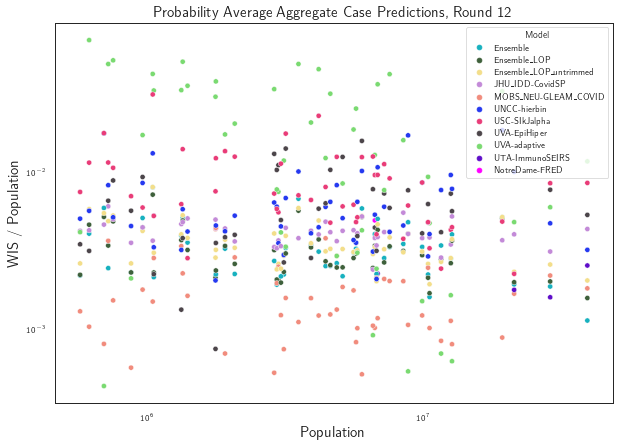

In [625]:
fig, ax = plt.subplots(figsize=(10,7))
flatui = ['#17B1BF', '#3E603B', '#F3DE8A', '#C38AD8', '#F18C7D', '#2539F0', '#E93C78', '#4C454A', '#7ADA71', '#5F0EC9',
         'magenta']
#sns.set_palette(flatui)

sns.set_style("white")
sns.axes_style("white")
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15})
sns.set_palette(flatui)




sns.scatterplot(ax = ax, data = df_probavg_case,x=df_probavg_case['Population'],
                y=df_probavg_case['WIS']/df_probavg_case['Population']
                , hue='Model' , s=27).set(title='Probability Average Aggregate Case Predictions, Round 12')
ax.set( ylabel='WIS / Population')
plt.xscale('log')
plt.yscale('log')
#plt.savefig('wispop_hosp.pdf')
plt.show()

In [626]:
models = ["Ensemble","Ensemble_LOP","Ensemble_LOP_untrimmed","JHU_IDD-CovidSP","MOBS_NEU-GLEAM_COVID","NCSU-COVSIM","UNCC-hierbin","USC-SIkJalpha",
           "UVA-EpiHiper","UVA-adaptive"]

dfrank = pd.DataFrame(columns=['Model', 'Location', 'Rank'])

states = list(df_probavg_case.Location.unique())
target = 'case'

if target == 'hosp':
    df = df_all_hosp
elif target == 'death':
    df = df_all_death
elif target == 'case':
    df = df_probavg_case
    
    
for state in states:
    filt = df[df['Location']==state]
    filt = filt.sort_values('WIS')

    rank = list(filt.Model)
    for model in models:
        if model not in rank:
            continue
        rankval = rank.index(model)+1
        
        new_row = {'Model':model, 'Location': state, 'Rank': rankval}
 
        dfrank = dfrank.append(new_row, ignore_index=True)

In [627]:
dfrank_probavg_case = dfrank

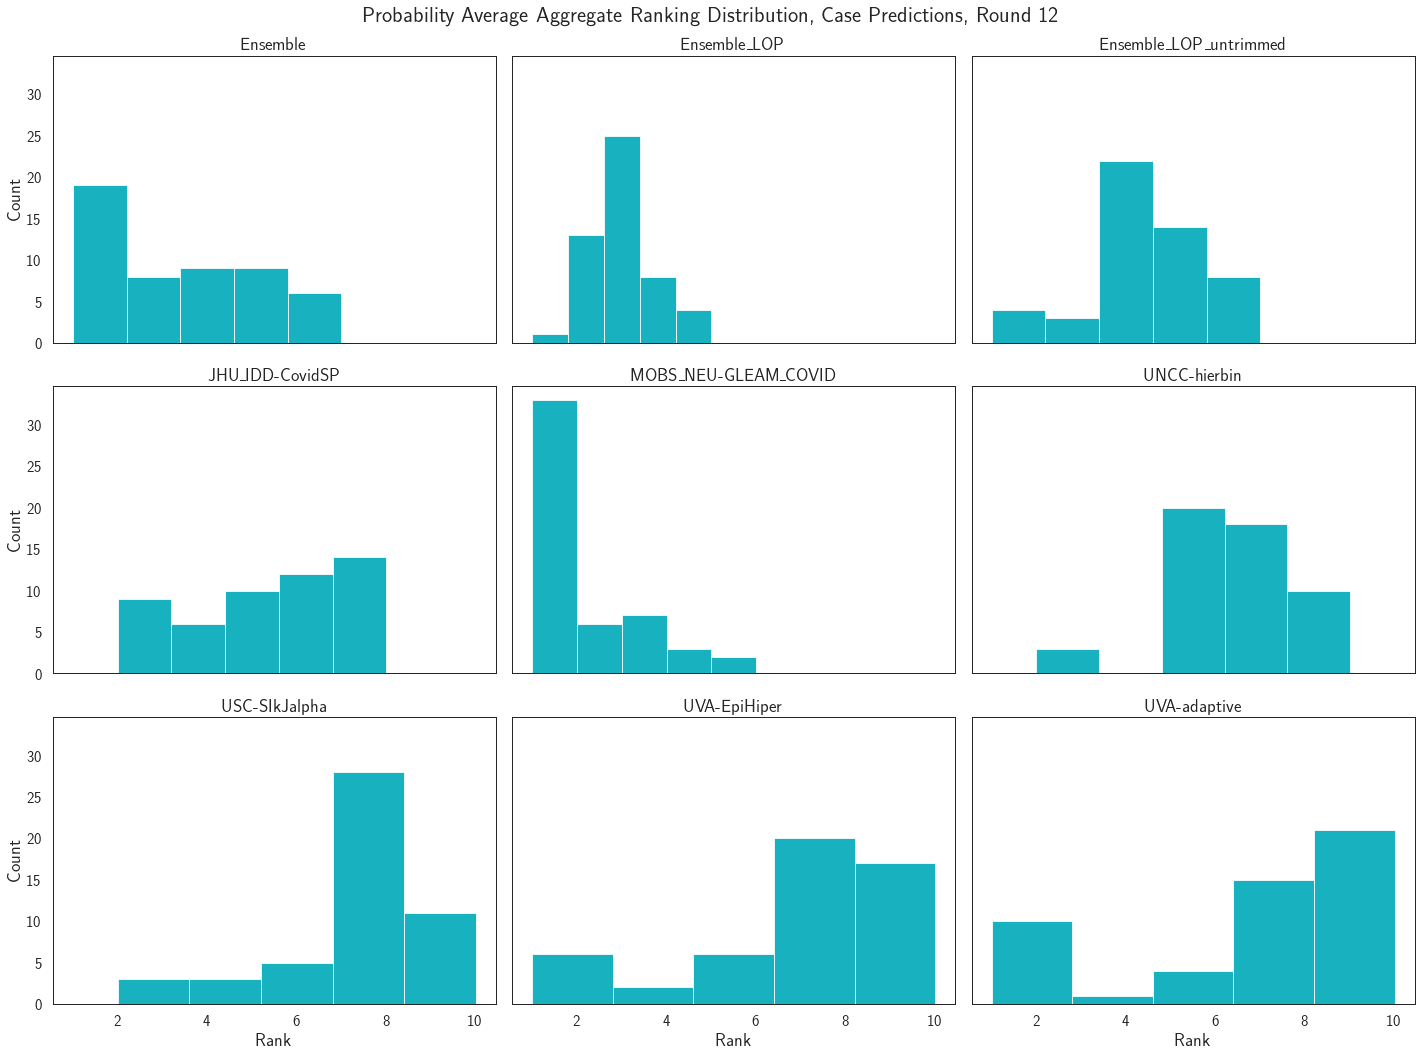

In [630]:
plt.rcParams.update({'axes.titlesize':'18'})
ax = dfrank_probavg_case.plot.hist( column='Rank', by='Model', bins=5, grid=False, figsize=(20,15), layout=(3,3), sharex=True,
                      sharey=True, color='#17B1BF', fontsize=16, legend=None)

for a in ax.flatten():
    a.set_xlabel("Rank", fontsize=18)
    a.set_ylabel("Count", fontsize=18)
    
plt.suptitle("Probability Average Aggregate Ranking Distribution, Case Predictions, Round 12", fontsize=22)
plt.tight_layout()
#plt.savefig('case_rd12_rankings.pdf')
plt.show()